In [1]:
import torch
import numpy as np
import random
from torch.utils.data import DataLoader
from torch.utils.data import Dataset, TensorDataset
from torch.utils.data.dataset import random_split

import torch.nn as nn
import time
from matplotlib import pyplot as plt
import os
import sys
sys.path.append("/Users/charlottebeylier/Documents/PhD/Spatial and Conceptual Learning/github_code/Mono_Multi_TASK")

from Experiment_v5 import Experiment
from IPython.display import clear_output
from Check import Checkup
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA, IncrementalPCA

sys.path.append("/Users/charlottebeylier/Documents/PhD/Atari1.0/Reinforcement-Learning_modif/cgames/02_space_invader/Analysis")
from Manifold_Analysis import Manifold_analysis
from matplotlib import animation
from IPython.display import HTML
from tabulate import tabulate


# importing required libraries
from mpl_toolkits.mplot3d import Axes3D

from sklearn.datasets import load_iris
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.manifold import MDS
from sklearn.manifold import Isomap
from sklearn.metrics import pairwise_distances

from matplotlib.ticker import NullFormatter
from collections import OrderedDict
from functools import partial
from sklearn import manifold, datasets

In [2]:
# if gpu is to be used
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device: ", device)

def set_seed(seed=None, seed_torch=True):
    if seed is None:
        seed = np.random.choice(2 ** 32)
    random.seed(seed)
    np.random.seed(seed)
    if seed_torch:
        torch.manual_seed(seed)

    print(f'Random seed {seed} has been set.')

SEED = 2021
set_seed(seed=SEED)
# if gpu is to be used
#device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#print("Device: ", device)

G_SEED = torch.Generator()
G_SEED.manual_seed(SEED)

Device:  cpu
Random seed 2021 has been set.


In [3]:
WIDTH = 100
BATCH_SIZE = 32
Names_hook = ["fc1","fc2","fc3"]
set_seed(seed=SEED)

experiment = Experiment(width = WIDTH,batch_size=BATCH_SIZE,size_output_multi = 2)


dataset_train,dataset_space_train,dataset_weather_train,dataset_val,dataset_space_val,dataset_weather_val,dataset_test,dataset_space_test,dataset_weather_test= experiment.Generate_data()
train_loader = torch.utils.data.DataLoader(dataset_train,batch_size=BATCH_SIZE,shuffle = False )
val_loader = torch.utils.data.DataLoader(dataset_val,batch_size=BATCH_SIZE,shuffle = False )
test_loader_multi = torch.utils.data.DataLoader(dataset_test,batch_size=1,shuffle = False ) #bATCH SIZE =1 HERE FOR THE DATASET ONLY, ELSE TAKE WHATEVER BATCH SIZE IN INDIVIDUAL MODE

Random seed 2021 has been set.
Test size dataset space torch.Size([999, 6])
Test size dataset weather torch.Size([999, 6])
Train size dataset space torch.Size([7000, 6])
Train size dataset weather torch.Size([7000, 6])


In [4]:
Input_Dimension = 6
Nodes_Second = 20
Nodes_Third =10
Output_Dimension = 2
ITERATION = 1

In [5]:
parent_dir = os.getcwd()
try:
    os.mkdir("Multi")
except OSError as error:
    pass


for layer in range(len(Names_hook)):
    try:
        os.mkdir(os.path.join(parent_dir,"Multi",Names_hook[layer]))
        
    except OSError as error:
        pass



Epoch 190, val_loss 0.0541532455928742


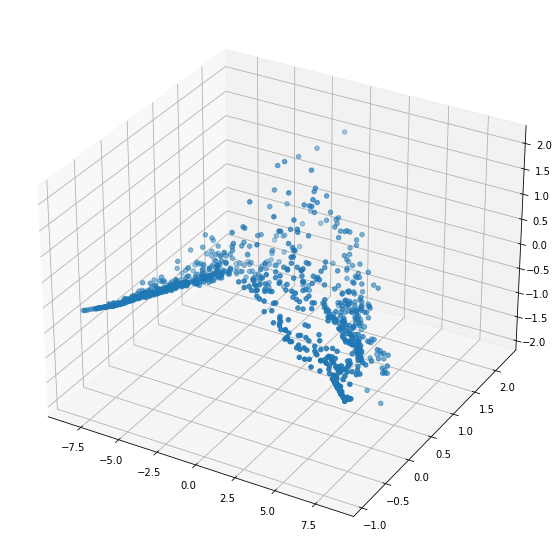

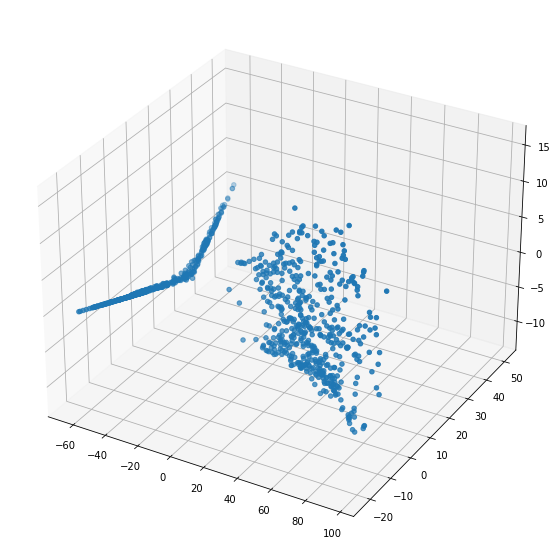

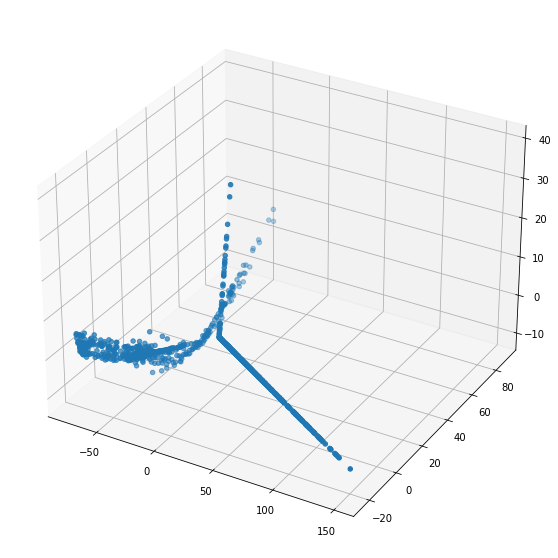

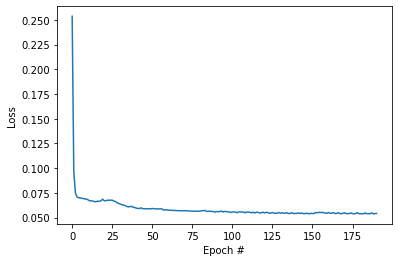

/Users/charlottebeylier/Documents/PhD/Spatial and Conceptual Learning/github_code/Mono_Multi_TASK/Multi/fc1/step_190.jpg


/opt/anaconda3/envs/atari1.0/lib/python3.7/site-packages/sklearn/manifold/_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/opt/anaconda3/envs/atari1.0/lib/python3.7/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


/Users/charlottebeylier/Documents/PhD/Spatial and Conceptual Learning/github_code/Mono_Multi_TASK/Multi/fc2/step_190.jpg


/opt/anaconda3/envs/atari1.0/lib/python3.7/site-packages/sklearn/manifold/_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/opt/anaconda3/envs/atari1.0/lib/python3.7/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


/Users/charlottebeylier/Documents/PhD/Spatial and Conceptual Learning/github_code/Mono_Multi_TASK/Multi/fc3/step_190.jpg


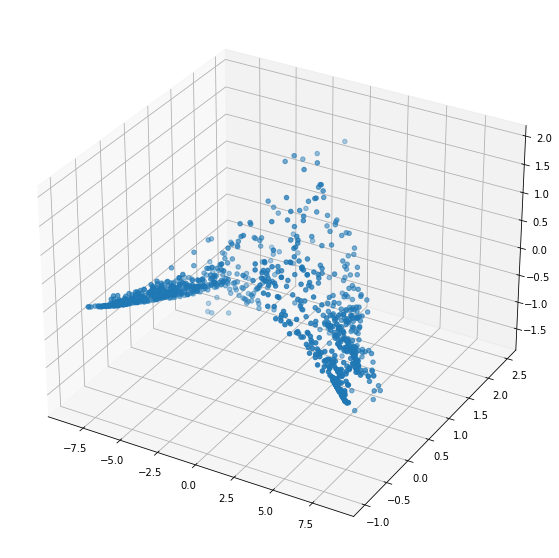

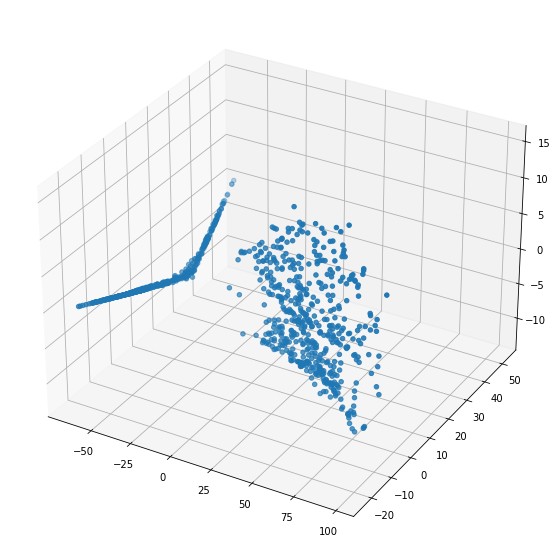

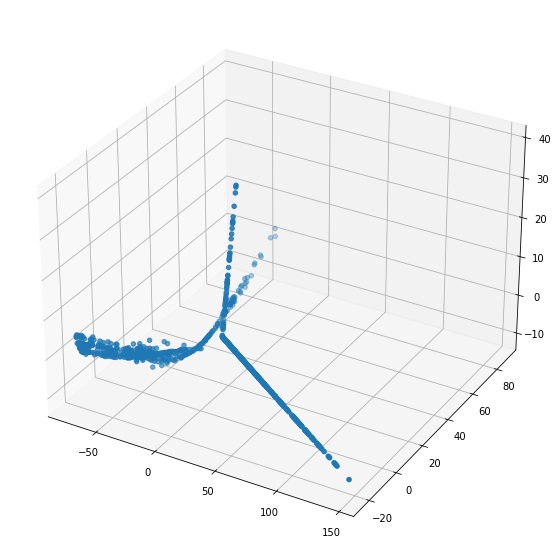

In [10]:
EPOCH = 200
N = 10
Multi_losses = []
representation_analysis = True

training = Training()
model,val_losses = training.training_multi(Input_Dimension,Nodes_Second,Nodes_Third,Output_Dimension,EPOCH,train_loader,val_loader,test_loader_multi,representation_analysis,N)
Multi_losses.append(val_losses)